**Nama**: Muhammad Rizqi  
**NIM**: 4612422028

**Tugas**:
Mahasiswa disuruh membuat pembuktian step-by-step dari proses penghitungan PDF ini: [https://drive.google.com/drive/u/1/folders/16ZpEPO4MQGBWJ0RkEcK7hcfgmB7xqVNH](https://drive.google.com/drive/u/1/folders/16ZpEPO4MQGBWJ0RkEcK7hcfgmB7xqVNH)  
**Alasan saya buat ini**:
Saya malas nulis manual dan cari manual di kertas, sepertinya akan jauh lebih ringkas jika saya membuat kodenya saja. Sekalian belajar koding. Disini saya buat fungsi, yaitu fungsi Entropi dan fungsi Gain. Menyesuaikan yang ada di PDF rumusnya. Kedua fungsi nantinya berguna untuk menampilkan step-by-step langkah yang tidak dijabarkan dalam PDF.

*Gunakan daftar isi untuk mempermudah Anda dalam membaca*

# Fungsi

## Entropi


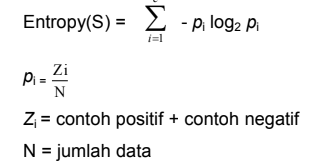

In [ ]:
import math

def entropy(klasifikasi, step=False):
    """
    Fungsi untuk menampilkan proses pencarian entropi
    params:
    - step = False (default), ya/tidak untuk mengeluarkan langkah demi langkah
    parameter ini membantu untuk menghitung nanti dalam fungsi gain()
    - kumpulan angka yang pengen dicari (list)
    """
    length = len(klasifikasi)
    total = sum(klasifikasi)

    if 0 in klasifikasi:
        if step==True:
            print('Karena ada 0 di dalam klasifikasi, maka entropy = 0')
        return 0

    if step==False:
        total_i = 0
        for num in klasifikasi:
            division = num/total
            result = (division*(math.log(division)/(math.log(2))))*(-1)
            total_i += result
        return total_i

    #############
    # kode bawah tereksekusi jika step=True
    #############

    # proses 0
    print(f'Entropi({list(klasifikasi)})')

    # proses 1 - penampilan iniasi fungsi
    list_str_1 = []
    list_num_1 = []
    for num in klasifikasi:
        str_1 = f"- ({num}/{total})log2({num}/{total})"
        list_str_1.append(str_1)
    print(f"= {' '.join(str(item) for item in list_str_1)}")

    # Proses 2
    list_str_2 = []
    for num in klasifikasi:
        division = num/total
        str_2 = f"- ({division:.3f})((log({num}/{total}))/log(2))"
        list_str_2.append(str_2)
    print(f"= {' '.join(str(item) for item in list_str_2)}")

    # Proses 3
    list_str_3 = []
    for num in klasifikasi:
        division = num/total
        str_3 = f"- ({division:.3f})({(math.log(division)):.3f}/{(math.log(2)):.3f})"
        list_str_3.append(str_3)
    print(f"= {' '.join(str(item) for item in list_str_3)}")

    # Proses 4
    list_str_4 = []
    for num in klasifikasi:
        division = num/total
        str_4 = f"- ({division:.3f})({(math.log(division)/(math.log(2))):.3f})"
        list_str_4.append(str_4)
    print(f"= {' '.join(str(item) for item in list_str_4)}")

    # Proses 5
    list_str_5 = []
    result_5 = []
    for num in klasifikasi:
        division = num/total
        result = (division*(math.log(division)/(math.log(2))))*(-1)
        str_5 = f"{result:.3f}"
        list_str_5.append(str_5)
        result_5.append(result)
    print(f"= {' + '.join(str(item) for item in list_str_5)}")

    # Proses 6
    print(f"= {(sum(result_5)):.3f}")

In [ ]:
# Contoh Penggunaan
entropy([9,5],True)

Entropi([9, 5])
= - (9/14)log2(9/14) - (5/14)log2(5/14)
= - (0.643)((log(9/14))/log(2)) - (0.357)((log(5/14))/log(2))
= - (0.643)(-0.442/0.693) - (0.357)(-1.030/0.693)
= - (0.643)(-0.637) - (0.357)(-1.485)
= 0.410 + 0.531
= 0.940


In [ ]:
# Contoh Penggunaan
entropy([5,4])

0.9910760598382222

## Gain

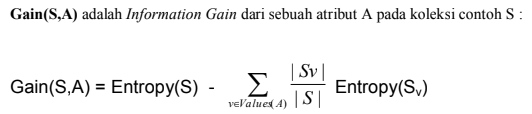

In [ ]:
def gain(S, A, step=False):
    """
    Fungsi untuk mencari gain dengan input klasifikasi tertentu
    params:
    - S: (list) klasifikasi untuk entropi utama
    - A: (nested list) klasifikasi untuk setiap jenis klasifikasi untuk entropi utama
    - step: untuk mengeluarkan output step-by-step
    """
    #############################################
    # Manajemen Eror jika total S dan total A tidak sama
    #############################################
    total_S = sum(S)
    total_A = 0
    for a in A:
        tot_a = sum(a)
        total_A += tot_a
    if total_S != total_A:
        print("total klasifikasi S dan A tidak sama")
        return
    #############################################
    # Langsung dihitung tanpa ada tampilan
    #############################################
    if step==False:
        total_result = 0
        entropi_S = entropy(S)
        entropi_list = []
        total_result = entropi_S
        for klasifikasi in A:
            tot_klasifikasi = sum(klasifikasi)
            entropi_sementara = entropy(klasifikasi)
            entropi_list.append(entropi_sementara)
            result_rasio = (tot_klasifikasi/total_S)*entropi_sementara
            total_result -= result_rasio
        return total_result
    #############################################
    # Menampilkan langkah demi langkah penghitungan
    #############################################
    ##### proses 0 gain()
    i = 1
    list_proses0 = ['Entropy(S)']
    list_namaA = []
    for klasifikasi in A:
        namaA = f"A{i}"
        list_namaA.append(namaA)
        str_proses0 = f"- ({sum(klasifikasi)}/{total_S})Entropy({namaA})"
        i += 1
        list_proses0.append(str_proses0)
    print(f"Gain(S,A) = {' '.join(str(item) for item in list_proses0)}")
    print() # untuk spasi

    ##### proses entropy(S)
    print("Entropy(S)")
    entropy(S,True)
    print()

    ##### proses entropy(A) - For looping
    for i in range(len(A)):
        print(f"Entropy({list_namaA[i]})")
        entropy(A[i],True)
        print()

    ##### proses 1 gain()
    print(f"Gain(S,A)")
    print(f"= {' '.join(str(item) for item in list_proses0)}")

    ##### proses 2 gain()
    list_str_2 = []
    for kl_A in A:
        # entropyA = (sum(kl_A)/sum(S))*entropy(kl_A)
        entropyA = entropy(kl_A)
        str_proses2 = f"- ({(sum(kl_A)/sum(S)):.3f})({entropyA:.3f})"
        list_str_2.append(str_proses2)
    print(f"= {entropy(S):.3f} {' '.join(str(item) for item in list_str_2)}")

    ##### proses 3 gain()
    list_str_3 = []
    for kl_A in A:
        rasio_entropy = (sum(kl_A)/sum(S))*entropy(kl_A)
        str_proses3 = f"- {rasio_entropy:.3f}"
        list_str_3.append(str_proses3)
    print(f"= {entropy(S):.3f} {' '.join(str(item) for item in list_str_3)}")

    ##### proses 4 gain()
    total_result = 0
    entropi_S = entropy(S)
    entropi_list = []
    total_result = entropi_S
    for klasifikasi in A:
        tot_klasifikasi = sum(klasifikasi)
        entropi_sementara = entropy(klasifikasi)
        entropi_list.append(entropi_sementara)
        result_rasio = (tot_klasifikasi/total_S)*entropi_sementara
        total_result -= result_rasio
    print(f"= {total_result:.5f}")

In [ ]:
# Contoh penggunaan
gain([9,5], [[6,2], [3,3]], True)

Gain(S,A) = Entropy(S) - (8/14)Entropy(A1) - (6/14)Entropy(A2)

Entropy(S)
Entropi([9, 5])
= - (9/14)log2(9/14) - (5/14)log2(5/14)
= - (0.643)((log(9/14))/log(2)) - (0.357)((log(5/14))/log(2))
= - (0.643)(-0.442/0.693) - (0.357)(-1.030/0.693)
= - (0.643)(-0.637) - (0.357)(-1.485)
= 0.410 + 0.531
= 0.940

Entropy(A1)
Entropi([6, 2])
= - (6/8)log2(6/8) - (2/8)log2(2/8)
= - (0.750)((log(6/8))/log(2)) - (0.250)((log(2/8))/log(2))
= - (0.750)(-0.288/0.693) - (0.250)(-1.386/0.693)
= - (0.750)(-0.415) - (0.250)(-2.000)
= 0.311 + 0.500
= 0.811

Entropy(A2)
Entropi([3, 3])
= - (3/6)log2(3/6) - (3/6)log2(3/6)
= - (0.500)((log(3/6))/log(2)) - (0.500)((log(3/6))/log(2))
= - (0.500)(-0.693/0.693) - (0.500)(-0.693/0.693)
= - (0.500)(-1.000) - (0.500)(-1.000)
= 0.500 + 0.500
= 1.000

Gain(S,A)
= Entropy(S) - (8/14)Entropy(A1) - (6/14)Entropy(A2)
= 0.940 - (0.571)(0.811) - (0.429)(1.000)
= 0.940 - 0.464 - 0.429
= 0.04813


In [ ]:
# Contoh penggunaan
gain([9,5], [[6,2], [3,3]])

0.04812703040826932

# Halaman 2 - Pengenalan fungsi entropi

In [ ]:
entropy([9,5], True)

Entropi([9, 5])
= - (9/14)log2(9/14) - (5/14)log2(5/14)
= - (0.643)((log(9/14))/log(2)) - (0.357)((log(5/14))/log(2))
= - (0.643)(-0.442/0.693) - (0.357)(-1.030/0.693)
= - (0.643)(-0.637) - (0.357)(-1.485)
= 0.410 + 0.531
= 0.940


# Halaman 3 - Pengenalan fungsi gain
S = [9,5]

## 1) Values(Angin) = Lemah, Kuat
(A1) Slemah = [6,2]  
(A2) Skuat = [3,4]

In [ ]:
gain([9,5], [[6,2], [3,3]], True)

Gain(S,A) = Entropy(S) - (8/14)Entropy(A1) - (6/14)Entropy(A2)

Entropy(S)
Entropi([9, 5])
= - (9/14)log2(9/14) - (5/14)log2(5/14)
= - (0.643)((log(9/14))/log(2)) - (0.357)((log(5/14))/log(2))
= - (0.643)(-0.442/0.693) - (0.357)(-1.030/0.693)
= - (0.643)(-0.637) - (0.357)(-1.485)
= 0.410 + 0.531
= 0.940

Entropy(A1)
Entropi([6, 2])
= - (6/8)log2(6/8) - (2/8)log2(2/8)
= - (0.750)((log(6/8))/log(2)) - (0.250)((log(2/8))/log(2))
= - (0.750)(-0.288/0.693) - (0.250)(-1.386/0.693)
= - (0.750)(-0.415) - (0.250)(-2.000)
= 0.311 + 0.500
= 0.811

Entropy(A2)
Entropi([3, 3])
= - (3/6)log2(3/6) - (3/6)log2(3/6)
= - (0.500)((log(3/6))/log(2)) - (0.500)((log(3/6))/log(2))
= - (0.500)(-0.693/0.693) - (0.500)(-0.693/0.693)
= - (0.500)(-1.000) - (0.500)(-1.000)
= 0.500 + 0.500
= 1.000

Gain(S,A)
= Entropy(S) - (8/14)Entropy(A1) - (6/14)Entropy(A2)
= 0.940 - (0.571)(0.811) - (0.429)(1.000)
= 0.940 - 0.464 - 0.429
= 0.04813


## 2) Values(Kelembaban) = Tinggi, Normal
(A1) Stinggi = [3,4]  
(A2) Snormal = [6,1]

In [ ]:
gain([9,5], [[3,4], [6,1]], True)

Gain(S,A) = Entropy(S) - (7/14)Entropy(A1) - (7/14)Entropy(A2)

Entropy(S)
Entropi([9, 5])
= - (9/14)log2(9/14) - (5/14)log2(5/14)
= - (0.643)((log(9/14))/log(2)) - (0.357)((log(5/14))/log(2))
= - (0.643)(-0.442/0.693) - (0.357)(-1.030/0.693)
= - (0.643)(-0.637) - (0.357)(-1.485)
= 0.410 + 0.531
= 0.940

Entropy(A1)
Entropi([3, 4])
= - (3/7)log2(3/7) - (4/7)log2(4/7)
= - (0.429)((log(3/7))/log(2)) - (0.571)((log(4/7))/log(2))
= - (0.429)(-0.847/0.693) - (0.571)(-0.560/0.693)
= - (0.429)(-1.222) - (0.571)(-0.807)
= 0.524 + 0.461
= 0.985

Entropy(A2)
Entropi([6, 1])
= - (6/7)log2(6/7) - (1/7)log2(1/7)
= - (0.857)((log(6/7))/log(2)) - (0.143)((log(1/7))/log(2))
= - (0.857)(-0.154/0.693) - (0.143)(-1.946/0.693)
= - (0.857)(-0.222) - (0.143)(-2.807)
= 0.191 + 0.401
= 0.592

Gain(S,A)
= Entropy(S) - (7/14)Entropy(A1) - (7/14)Entropy(A2)
= 0.940 - (0.500)(0.985) - (0.500)(0.592)
= 0.940 - 0.493 - 0.296
= 0.15184


## 3) Values(Suhu) = Panas, Sejuk, Dingin
(A1) Spanas = [2,2]  
(A2) Ssejuk = [4,2]  
(A3) Sdingin = [3, 1]

In [ ]:
gain([9,5], [[2,2], [4,2], [3,1]], True)

Gain(S,A) = Entropy(S) - (4/14)Entropy(A1) - (6/14)Entropy(A2) - (4/14)Entropy(A3)

Entropy(S)
Entropi([9, 5])
= - (9/14)log2(9/14) - (5/14)log2(5/14)
= - (0.643)((log(9/14))/log(2)) - (0.357)((log(5/14))/log(2))
= - (0.643)(-0.442/0.693) - (0.357)(-1.030/0.693)
= - (0.643)(-0.637) - (0.357)(-1.485)
= 0.410 + 0.531
= 0.940

Entropy(A1)
Entropi([2, 2])
= - (2/4)log2(2/4) - (2/4)log2(2/4)
= - (0.500)((log(2/4))/log(2)) - (0.500)((log(2/4))/log(2))
= - (0.500)(-0.693/0.693) - (0.500)(-0.693/0.693)
= - (0.500)(-1.000) - (0.500)(-1.000)
= 0.500 + 0.500
= 1.000

Entropy(A2)
Entropi([4, 2])
= - (4/6)log2(4/6) - (2/6)log2(2/6)
= - (0.667)((log(4/6))/log(2)) - (0.333)((log(2/6))/log(2))
= - (0.667)(-0.405/0.693) - (0.333)(-1.099/0.693)
= - (0.667)(-0.585) - (0.333)(-1.585)
= 0.390 + 0.528
= 0.918

Entropy(A3)
Entropi([3, 1])
= - (3/4)log2(3/4) - (1/4)log2(1/4)
= - (0.750)((log(3/4))/log(2)) - (0.250)((log(1/4))/log(2))
= - (0.750)(-0.288/0.693) - (0.250)(-1.386/0.693)
= - (0.750)(-0.415) - (0.2

## 4) Values(Suhu) = Cerah, Mendung, Hujan
(A1) Scerah = [2,3]  
(A2) Smendung = [4,0]  
(A3) Shujan = [3,2]

In [ ]:
gain([9,5], [[2,3], [4,0], [3,2]], True)

Gain(S,A) = Entropy(S) - (5/14)Entropy(A1) - (4/14)Entropy(A2) - (5/14)Entropy(A3)

Entropy(S)
Entropi([9, 5])
= - (9/14)log2(9/14) - (5/14)log2(5/14)
= - (0.643)((log(9/14))/log(2)) - (0.357)((log(5/14))/log(2))
= - (0.643)(-0.442/0.693) - (0.357)(-1.030/0.693)
= - (0.643)(-0.637) - (0.357)(-1.485)
= 0.410 + 0.531
= 0.940

Entropy(A1)
Entropi([2, 3])
= - (2/5)log2(2/5) - (3/5)log2(3/5)
= - (0.400)((log(2/5))/log(2)) - (0.600)((log(3/5))/log(2))
= - (0.400)(-0.916/0.693) - (0.600)(-0.511/0.693)
= - (0.400)(-1.322) - (0.600)(-0.737)
= 0.529 + 0.442
= 0.971

Entropy(A2)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A3)
Entropi([3, 2])
= - (3/5)log2(3/5) - (2/5)log2(2/5)
= - (0.600)((log(3/5))/log(2)) - (0.400)((log(2/5))/log(2))
= - (0.600)(-0.511/0.693) - (0.400)(-0.916/0.693)
= - (0.600)(-0.737) - (0.400)(-1.322)
= 0.442 + 0.529
= 0.971

Gain(S,A)
= Entropy(S) - (5/14)Entropy(A1) - (4/14)Entropy(A2) - (5/14)Entropy(A3)
= 0.940 - (0.357)(0.971) - (0.286)(0.000) - (0.357)(

# Halaman 4 - node cabang Ramalan_Cuaca = Cerah
S = [2,3]

## 1) Values(Suhu) = Panas, Sejuk, Dingin
(A1) Spanas = [0,2]  
(A2) Ssejuk = [1,1]  
(A3) Sdingin = [1, 0]

In [ ]:
gain([2,3], [[0,2], [1,1], [1,0]], True)

Gain(S,A) = Entropy(S) - (2/5)Entropy(A1) - (2/5)Entropy(A2) - (1/5)Entropy(A3)

Entropy(S)
Entropi([2, 3])
= - (2/5)log2(2/5) - (3/5)log2(3/5)
= - (0.400)((log(2/5))/log(2)) - (0.600)((log(3/5))/log(2))
= - (0.400)(-0.916/0.693) - (0.600)(-0.511/0.693)
= - (0.400)(-1.322) - (0.600)(-0.737)
= 0.529 + 0.442
= 0.971

Entropy(A1)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A2)
Entropi([1, 1])
= - (1/2)log2(1/2) - (1/2)log2(1/2)
= - (0.500)((log(1/2))/log(2)) - (0.500)((log(1/2))/log(2))
= - (0.500)(-0.693/0.693) - (0.500)(-0.693/0.693)
= - (0.500)(-1.000) - (0.500)(-1.000)
= 0.500 + 0.500
= 1.000

Entropy(A3)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Gain(S,A)
= Entropy(S) - (2/5)Entropy(A1) - (2/5)Entropy(A2) - (1/5)Entropy(A3)
= 0.971 - (0.400)(0.000) - (0.400)(1.000) - (0.200)(0.000)
= 0.971 - 0.000 - 0.400 - 0.000
= 0.57095


## 2) Values(Kelembaban) = Tinggi, Normal
(A1) Stinggi = [0,3]  
(A2) Snormal = [2,0]

In [ ]:
gain([2,3], [[0,3], [2,0]], True)

Gain(S,A) = Entropy(S) - (3/5)Entropy(A1) - (2/5)Entropy(A2)

Entropy(S)
Entropi([2, 3])
= - (2/5)log2(2/5) - (3/5)log2(3/5)
= - (0.400)((log(2/5))/log(2)) - (0.600)((log(3/5))/log(2))
= - (0.400)(-0.916/0.693) - (0.600)(-0.511/0.693)
= - (0.400)(-1.322) - (0.600)(-0.737)
= 0.529 + 0.442
= 0.971

Entropy(A1)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A2)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Gain(S,A)
= Entropy(S) - (3/5)Entropy(A1) - (2/5)Entropy(A2)
= 0.971 - (0.600)(0.000) - (0.400)(0.000)
= 0.971 - 0.000 - 0.000
= 0.97095


## 3) Values(Angin) = Lemah, Kuat
(A1) Slemah = [1,2]  
(A2) Skuat = [1,1]

In [ ]:
gain([2,3], [[1,2], [1,1]], True)

Gain(S,A) = Entropy(S) - (3/5)Entropy(A1) - (2/5)Entropy(A2)

Entropy(S)
Entropi([2, 3])
= - (2/5)log2(2/5) - (3/5)log2(3/5)
= - (0.400)((log(2/5))/log(2)) - (0.600)((log(3/5))/log(2))
= - (0.400)(-0.916/0.693) - (0.600)(-0.511/0.693)
= - (0.400)(-1.322) - (0.600)(-0.737)
= 0.529 + 0.442
= 0.971

Entropy(A1)
Entropi([1, 2])
= - (1/3)log2(1/3) - (2/3)log2(2/3)
= - (0.333)((log(1/3))/log(2)) - (0.667)((log(2/3))/log(2))
= - (0.333)(-1.099/0.693) - (0.667)(-0.405/0.693)
= - (0.333)(-1.585) - (0.667)(-0.585)
= 0.528 + 0.390
= 0.918

Entropy(A2)
Entropi([1, 1])
= - (1/2)log2(1/2) - (1/2)log2(1/2)
= - (0.500)((log(1/2))/log(2)) - (0.500)((log(1/2))/log(2))
= - (0.500)(-0.693/0.693) - (0.500)(-0.693/0.693)
= - (0.500)(-1.000) - (0.500)(-1.000)
= 0.500 + 0.500
= 1.000

Gain(S,A)
= Entropy(S) - (3/5)Entropy(A1) - (2/5)Entropy(A2)
= 0.971 - (0.600)(0.918) - (0.400)(1.000)
= 0.971 - 0.551 - 0.400
= 0.01997


# Halaman 5 - node cabang Ramalan_Cuaca = Hujan
Shujan = [3,2]

## 1) Values(Suhu) = Panas, Sejuk, Dingin
(A1) Spanas = [0,0]  
(A2) Ssejuk = [2,1]  
(A3) Sdingin = [1, 1]

In [ ]:
gain([3,2], [[0,0], [2,1], [1,1]], True)

Gain(S,A) = Entropy(S) - (0/5)Entropy(A1) - (3/5)Entropy(A2) - (2/5)Entropy(A3)

Entropy(S)
Entropi([3, 2])
= - (3/5)log2(3/5) - (2/5)log2(2/5)
= - (0.600)((log(3/5))/log(2)) - (0.400)((log(2/5))/log(2))
= - (0.600)(-0.511/0.693) - (0.400)(-0.916/0.693)
= - (0.600)(-0.737) - (0.400)(-1.322)
= 0.442 + 0.529
= 0.971

Entropy(A1)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A2)
Entropi([2, 1])
= - (2/3)log2(2/3) - (1/3)log2(1/3)
= - (0.667)((log(2/3))/log(2)) - (0.333)((log(1/3))/log(2))
= - (0.667)(-0.405/0.693) - (0.333)(-1.099/0.693)
= - (0.667)(-0.585) - (0.333)(-1.585)
= 0.390 + 0.528
= 0.918

Entropy(A3)
Entropi([1, 1])
= - (1/2)log2(1/2) - (1/2)log2(1/2)
= - (0.500)((log(1/2))/log(2)) - (0.500)((log(1/2))/log(2))
= - (0.500)(-0.693/0.693) - (0.500)(-0.693/0.693)
= - (0.500)(-1.000) - (0.500)(-1.000)
= 0.500 + 0.500
= 1.000

Gain(S,A)
= Entropy(S) - (0/5)Entropy(A1) - (3/5)Entropy(A2) - (2/5)Entropy(A3)
= 0.971 - (0.000)(0.000) - (0.600)(0.918) - (0.400)(1.000)
= 0.9

## 2) Values(Kelembaban) = Tinggi, Normal
(A1) Stinggi = [1,1]  
(A2) Snormal = [2,1]

In [ ]:
gain([3,2], [[1,1], [2,1]], True)

Gain(S,A) = Entropy(S) - (2/5)Entropy(A1) - (3/5)Entropy(A2)

Entropy(S)
Entropi([3, 2])
= - (3/5)log2(3/5) - (2/5)log2(2/5)
= - (0.600)((log(3/5))/log(2)) - (0.400)((log(2/5))/log(2))
= - (0.600)(-0.511/0.693) - (0.400)(-0.916/0.693)
= - (0.600)(-0.737) - (0.400)(-1.322)
= 0.442 + 0.529
= 0.971

Entropy(A1)
Entropi([1, 1])
= - (1/2)log2(1/2) - (1/2)log2(1/2)
= - (0.500)((log(1/2))/log(2)) - (0.500)((log(1/2))/log(2))
= - (0.500)(-0.693/0.693) - (0.500)(-0.693/0.693)
= - (0.500)(-1.000) - (0.500)(-1.000)
= 0.500 + 0.500
= 1.000

Entropy(A2)
Entropi([2, 1])
= - (2/3)log2(2/3) - (1/3)log2(1/3)
= - (0.667)((log(2/3))/log(2)) - (0.333)((log(1/3))/log(2))
= - (0.667)(-0.405/0.693) - (0.333)(-1.099/0.693)
= - (0.667)(-0.585) - (0.333)(-1.585)
= 0.390 + 0.528
= 0.918

Gain(S,A)
= Entropy(S) - (2/5)Entropy(A1) - (3/5)Entropy(A2)
= 0.971 - (0.400)(1.000) - (0.600)(0.918)
= 0.971 - 0.400 - 0.551
= 0.01997


## 3) Values(Angin) = Lemah, Kuat
(A1) Slemah = [3,0]  
(A2) Skuat = [0,2]

In [ ]:
gain([3,2], [[3,0], [0,2]], True)

Gain(S,A) = Entropy(S) - (3/5)Entropy(A1) - (2/5)Entropy(A2)

Entropy(S)
Entropi([3, 2])
= - (3/5)log2(3/5) - (2/5)log2(2/5)
= - (0.600)((log(3/5))/log(2)) - (0.400)((log(2/5))/log(2))
= - (0.600)(-0.511/0.693) - (0.400)(-0.916/0.693)
= - (0.600)(-0.737) - (0.400)(-1.322)
= 0.442 + 0.529
= 0.971

Entropy(A1)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A2)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Gain(S,A)
= Entropy(S) - (3/5)Entropy(A1) - (2/5)Entropy(A2)
= 0.971 - (0.600)(0.000) - (0.400)(0.000)
= 0.971 - 0.000 - 0.000
= 0.97095


# Tambahan - node cabang Ramalan_Cuaca = Mendung
*di pdf tidak ada, makanya saya tambahkan sendiri*

Smendung = [12,0]   
-> Tidak mungkn karena nanti nilai gain akan kurang dari 0 dikarenakan entropy(S) akan bernilai 0. Smendung mengandung 0 di dalamnya. Tapi akan tetap kita cek. Kemungkinan ga bakal keluar caranya karena semua tidak ada sentimen lain.

## 1) Values(Suhu) = Panas, Sejuk, Dingin
(A1) Spanas = [4,0]  
(A2) Ssejuk = [4,0]  
(A3) Sdingin = [4, 0]

In [ ]:
gain([12,0], [[4,0], [4,0], [4,0]], True)

Gain(S,A) = Entropy(S) - (4/12)Entropy(A1) - (4/12)Entropy(A2) - (4/12)Entropy(A3)

Entropy(S)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A1)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A2)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A3)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Gain(S,A)
= Entropy(S) - (4/12)Entropy(A1) - (4/12)Entropy(A2) - (4/12)Entropy(A3)
= 0.000 - (0.333)(0.000) - (0.333)(0.000) - (0.333)(0.000)
= 0.000 - 0.000 - 0.000 - 0.000
= 0.00000


## 2) Values(Kelembaban) = Tinggi, Normal
(A1) Stinggi = [6,0]  
(A2) Snormal = [6,0]

In [ ]:
gain([12,0], [[6,0], [6,0]], True)

Gain(S,A) = Entropy(S) - (6/12)Entropy(A1) - (6/12)Entropy(A2)

Entropy(S)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A1)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A2)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Gain(S,A)
= Entropy(S) - (6/12)Entropy(A1) - (6/12)Entropy(A2)
= 0.000 - (0.500)(0.000) - (0.500)(0.000)
= 0.000 - 0.000 - 0.000
= 0.00000


## 3) Values(Angin) = Lemah, Kuat
(A1) Slemah = [6,0]  
(A2) Skuat = [6,0]

In [ ]:
gain([12,0], [[6,0], [6,0]], True)

Gain(S,A) = Entropy(S) - (6/12)Entropy(A1) - (6/12)Entropy(A2)

Entropy(S)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A1)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Entropy(A2)
Karena ada 0 di dalam klasifikasi, maka entropy = 0

Gain(S,A)
= Entropy(S) - (6/12)Entropy(A1) - (6/12)Entropy(A2)
= 0.000 - (0.500)(0.000) - (0.500)(0.000)
= 0.000 - 0.000 - 0.000
= 0.00000
